In [1]:
# following the steps https://www.kaggle.com/solegalli/feature-selection-with-feature-engine

In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("..\\train.csv")

In [4]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
df.shape

(76020, 371)

In [6]:
df.TARGET.value_counts()/len(df.TARGET)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

In [7]:
df.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['ID','TARGET'],axis=1), df.TARGET, test_size=0.3)

X_train.shape, X_test.shape

((53214, 369), (22806, 369))

In [10]:
y_train.value_counts(normalize=True), y_train.value_counts()

(0    0.959841
 1    0.040159
 Name: TARGET, dtype: float64,
 0    51077
 1     2137
 Name: TARGET, dtype: int64)

## Feature Engineering

In [11]:
# import feature selection libraries
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

In [13]:
# check for any null values, and none found 
nullCols = []
for i in X_train.columns:
    if X_train[i].isnull().sum()>0:
        append.nullCols
print(nullCols)  

# [x for x in X_train.columns if X_train[x].isnull().sum() > 0]

[]


In [14]:
# we can see that these columns only have one value 
X_train.columns[X_train.nunique()==1]

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3',
       'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3', 'saldo_medio_var29_hace3'],
      dtype='object')

In [15]:
X_train.ind_var2_0.value_counts()

0    53214
Name: ind_var2_0, dtype: int64

### Check for constant Features

In [16]:
# tol=1, means to remove constant features
constant = DropConstantFeatures(tol=1)
# thenwe fit to find the features
constant.fit(X_train)

DropConstantFeatures()

In [17]:
constant.features_to_drop_

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var29_hace3']

In [18]:
len(constant.features_to_drop_)

35

In [19]:
# check one feature to see if it really has a constant feature
df.ind_var2_0.unique()

array([0], dtype=int64)

In [20]:
print('The number of features before dropping constants: ', X_train.shape[1])

X_train = constant.transform(X_train)
X_test = constant.transform(X_test)

print('The number of feature after dropping constants: ', X_train.shape[1])

The number of features before dropping constants:  369
The number of feature after dropping constants:  334


### Check for quasiconstant features

In [21]:
quasi_cons = DropConstantFeatures(tol=0.998)
quasi_cons.fit(X_train)

DropConstantFeatures(tol=0.998)

In [22]:
quasi_cons.features_to_drop_

['imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_sal_var16_ult1',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var29_0',
 'ind_var29',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var44_0',
 'ind_var44',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var17_0',
 'num_var17',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace2',
 'num_op_var40_hace3',
 'num_var29_0',
 'num_var29',
 'num_var32_0',
 'num_var32',
 'num_var33_0',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var44_0',
 'num_var44',
 'saldo_var6',
 'saldo_var13_medio',
 'saldo_var17',
 'saldo_var18',
 'saldo_var29',
 'saldo_var32',
 'saldo_var33',
 'saldo_var34',
 'saldo_var44',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3

In [23]:
len(quasi_cons.features_to_drop_)

142

In [24]:
# percentage of observation for each value 
X_train.saldo_medio_var44_hace2.value_counts()/len(X_train)

0.00        0.998835
1.26        0.000019
60832.68    0.000019
3459.72     0.000019
3200.16     0.000019
              ...   
2.67        0.000019
5153.22     0.000019
1702.74     0.000019
9529.20     0.000019
27781.50    0.000019
Name: saldo_medio_var44_hace2, Length: 63, dtype: float64

In [25]:
print('The number of features before dropping quasi-constants: ', X_train.shape[1])

X_train = quasi_cons.transform(X_train)
X_test = quasi_cons.transform(X_test)

print('The number of feature after dropping quasi-constants: ', X_train.shape[1])

The number of features before dropping quasi-constants:  334
The number of feature after dropping quasi-constants:  192


### Check for duplicated features

In [26]:
dups = DropDuplicateFeatures()

dups.fit(X_train)

DropDuplicateFeatures()

In [27]:
# here we see the group of identical variables
dups.duplicated_feature_sets_

[{'ind_var26', 'ind_var26_0'},
 {'ind_var25', 'ind_var25_0'},
 {'ind_var37', 'ind_var37_0'},
 {'ind_var39', 'ind_var40'},
 {'num_var26', 'num_var26_0'},
 {'num_var25', 'num_var25_0'},
 {'num_var37', 'num_var37_0'},
 {'num_var39', 'num_var40'}]

In [28]:
# check if it is indeed the case
X_train.ind_var26.equals(X_train.ind_var26_0)

True

In [29]:
# inspect actual variables
X_train[['ind_var26', 'ind_var26_0']].head()

,ind_var26,ind_var26_0
46068,0,0
73025,0,0
28281,0,0
38706,0,0
20121,0,0


In [30]:
print('Number of features before dropping: ', X_train.shape[1])

X_train = dups.transform(X_train)
X_test = dups.transform(X_test)

print('N0. of features after dropping: ', X_train.shape[1])

Number of features before dropping:  192
N0. of features after dropping:  184


### Drop Correlated Features

In [31]:
# if the variables is set to none, it will examine all variables
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
correlated.fit(X_train)

DropCorrelatedFeatures()

In [32]:
# Here we see features that are correlated, other items are correlated with multiple
correlated.correlated_feature_sets_

[{'imp_op_var39_comer_ult1',
  'imp_op_var39_comer_ult3',
  'imp_op_var41_comer_ult1',
  'imp_op_var41_comer_ult3'},
 {'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3'},
 {'imp_op_var40_ult1', 'saldo_var40'},
 {'imp_op_var39_efect_ult1',
  'imp_op_var39_ult1',
  'imp_op_var41_efect_ult1',
  'imp_op_var41_ult1'},
 {'imp_op_var39_efect_ult3', 'imp_op_var41_efect_ult3'},
 {'ind_var1_0', 'ind_var40_0', 'num_var1_0', 'num_var40_0'},
 {'ind_var1', 'ind_var40', 'num_var1', 'num_var40'},
 {'ind_var5_0',
  'ind_var8',
  'ind_var8_0',
  'num_var5_0',
  'num_var8',
  'num_var8_0'},
 {'ind_var30', 'ind_var5', 'num_meses_var5_ult3', 'num_var42', 'num_var5'},
 {'ind_var12', 'ind_var12_0', 'num_var12', 'num_var12_0'},
 {'ind_var13',
  'ind_var13_0',
  'ind_var13_corto',
  'ind_var13_corto_0',
  'num_meses_var13_corto_ult3',
  'num_var13',
  'num_var13_0',
  'num_var13_corto',
  'num_var13_corto_0'},
 {'ind_var13_largo',
  'ind_var13_largo_0',
  'num_var13_largo',
  'num_var13_largo_0'},
 {'ind_va

In [33]:
import seaborn as sns

<AxesSubplot:>

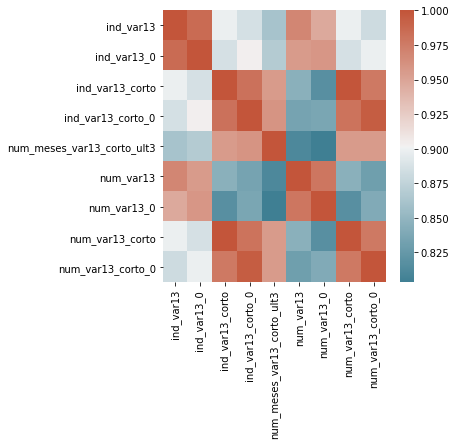

In [34]:
# plot a correlation map with some of the features 

corrmat = X_train[['ind_var13',
  'ind_var13_0',
  'ind_var13_corto',
  'ind_var13_corto_0',
  'num_meses_var13_corto_ult3',
  'num_var13',
  'num_var13_0',
  'num_var13_corto',
  'num_var13_corto_0']].corr(method='pearson')

cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig,ax=plt.subplots()
fig.set_size_inches(5,5)

sns.heatmap(corrmat, cmap=cmap)

the plot shows correlation over 0.8

In [35]:
len(correlated.features_to_drop_)

100

In [36]:
print('No. of features before removal: ', X_train.shape[1])

X_train = correlated.transform(X_train)
X_test = correlated.transform(X_test)

print('No. of features after removal: ', X_test.shape[1])

No. of features before removal:  184
No. of features after removal:  84


### Smart selection of correlated features



In [37]:
smart_corr = SmartCorrelatedSelection(variables=None, # examines all variables
                                     method='pearson', # correlation method
                                     threshold=0.7, # correlation coefficient threshold
                                     missing_values='ignore', #
                                     selection_method='model_performance', # how features are selected
                                     estimator=RandomForestClassifier(n_estimators=10,random_state=1)) # model for deriving importance

# This method simply finds correlated features and select the best from each group
# It builds a random forrest from each correlated feature and retains the feature with best performance

smart_corr.fit(X_train, y_train)

SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                          random_state=1),
                         selection_method='model_performance', threshold=0.7)

In [38]:
smart_corr.correlated_feature_sets_

[{'imp_op_var39_comer_ult1', 'num_op_var41_ult1'},
 {'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3'},
 {'ind_var1_0', 'var21'},
 {'ind_var5_0', 'num_meses_var8_ult3'},
 {'ind_var5', 'num_var30'},
 {'ind_var12_0', 'ind_var24_0', 'num_var30_0'},
 {'ind_var13_largo_0', 'num_meses_var13_largo_ult3', 'saldo_var13_largo'},
 {'ind_var14_0', 'num_var14_0'},
 {'ind_var31_0', 'num_var31_0'},
 {'num_op_var40_comer_ult1', 'num_op_var40_ult1'},
 {'saldo_var12', 'saldo_var30'},
 {'delta_imp_aport_var13_1y3', 'imp_aport_var13_ult1', 'num_aport_var13_ult1'},
 {'imp_aport_var13_hace3', 'num_aport_var13_hace3'},
 {'imp_trans_var37_ult1', 'imp_var43_emit_ult1'},
 {'num_var22_hace2', 'num_var22_ult3'},
 {'num_med_var45_ult3', 'num_var45_hace3'}]

In [39]:
# Here we examine the performance of RF based on each of the features that we select to understand what is happening

group = smart_corr.correlated_feature_sets_[5] # select the 6th group

for f in group:
    model=cross_validate(RandomForestClassifier(n_estimators=10,
                                random_state=1),
                        X_train[f].to_frame(),
                        y_train, cv=3,
                        return_estimator=False,
                        scoring='roc_auc')
    print(f,model['test_score'].mean())

num_var30_0 0.5356835120544865
ind_var12_0 0.5246418925947347
ind_var24_0 0.5159128000693042


num_var30_0 returns the highest score so it will be retained

In [40]:
# Check to see if it will be dropped

'num_var30_0' in smart_corr.features_to_drop_

False

In [41]:
# Check to see if it will be dropped

'ind_var12_0' in smart_corr.features_to_drop_

True

In [42]:
print('No. of features before: ', X_train.shape[1])

X_train = smart_corr.transform(X_train)
X_test = smart_corr.transform(X_test)

print('No. of features after: ', X_train.shape[1])

No. of features before:  84
No. of features after:  65


### Use pipeline to select features

In [43]:
data = pd.read_csv("..\\train.csv")

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['ID','TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((53214, 369), (22806, 369))

In [44]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])

# find features to remove

pipe.fit(X_train, y_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                                           random_state=1),
                                          selection_method='model_performance'))])

In [45]:
print('No. of features before: ', X_train.shape[1])

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

print('No. of features after: ', X_train.shape[1])

No. of features before:  369
No. of features after:  81


### Selecting Features by Shuffling

Trains a model using all features then shuffles the values of 1 feature to obtain a prediction. It determines if there is a performance drop. If there is a drop larger than a pre determined threshold, the feature will be dropped, otherwise it is retained.

In [46]:
# reload the data
data = pd.read_csv("..\\train.csv")

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['ID','TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((53214, 369), (22806, 369))

In [47]:
# remove constant, quasi-constant and duplicates

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
])

# fit to find the features to remove

pipe.fit(X_train, y_train)

# remove 

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [48]:
X_train.shape

(53214, 184)

In [49]:
shuffle = SelectByShuffling(
    estimator = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=1), # the model
    scoring="roc_auc", # the metric to determine model performance
    cv=3, # the cross-validation fold
)

shuffle.fit(X_train, y_train)

SelectByShuffling(estimator=RandomForestClassifier(max_depth=2, n_estimators=10,
                                                   random_state=1))

In [50]:
# this is the performace of the model (roc-auc) using all the features

shuffle.initial_model_performance_

0.7675761929904802

In [51]:
# performance drift caused by shuffling each feature

shuffle.performance_drifts_

{'var3': -0.0034556030868433396,
 'var15': 0.05038387649288856,
 'imp_ent_var16_ult1': -0.0039048335433380377,
 'imp_op_var39_comer_ult1': -0.0039048335433380377,
 'imp_op_var39_comer_ult3': -0.0039048335433380377,
 'imp_op_var40_comer_ult1': -0.0039048335433380377,
 'imp_op_var40_comer_ult3': -0.0039048335433380377,
 'imp_op_var40_ult1': -0.0039048335433380377,
 'imp_op_var41_comer_ult1': -0.0039048335433380377,
 'imp_op_var41_comer_ult3': -0.003944006997163685,
 'imp_op_var41_efect_ult1': -0.002985913998263312,
 'imp_op_var41_efect_ult3': -0.0017303020428988125,
 'imp_op_var41_ult1': -0.0039163940717424905,
 'imp_op_var39_efect_ult1': -0.0039048335433380377,
 'imp_op_var39_efect_ult3': -0.0017299953191149964,
 'imp_op_var39_ult1': -0.0039048335433380377,
 'ind_var1_0': -0.0039048335433380377,
 'ind_var1': -0.0039048335433380377,
 'ind_var5_0': -0.0039048335433380377,
 'ind_var5': 0.01980492429621039,
 'ind_var8_0': -0.0039048335433380377,
 'ind_var8': -0.0039048335433380377,
 'ind_va

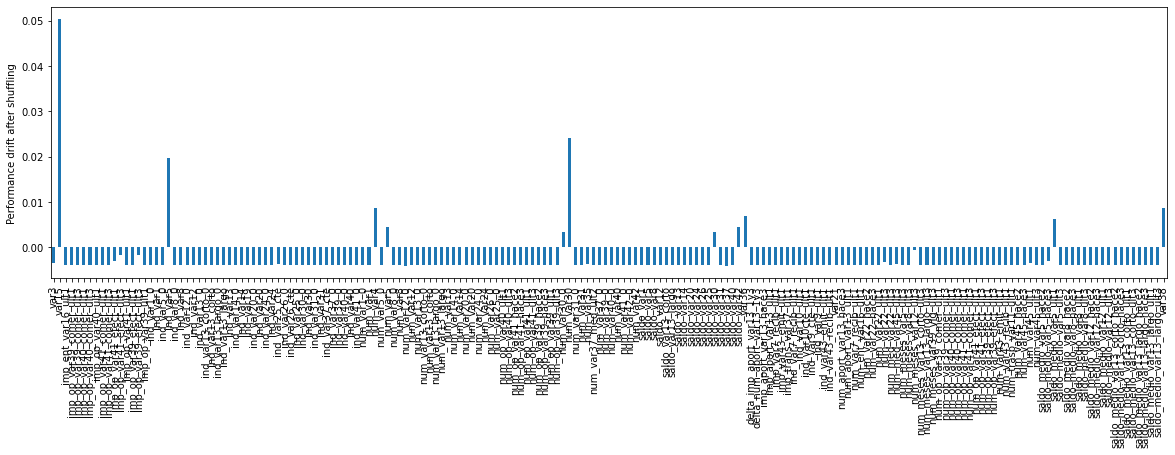

In [52]:
# plot the drift
pd.Series(shuffle.performance_drifts_).plot.bar(figsize=(20,5))
plt.ylabel('Performance drift after shuffling')
plt.show()

In [53]:
len(shuffle.features_to_drop_)

170

In [54]:
print('No. of features before drop: ', X_train.shape[1])

X_train = shuffle.transform(X_train)
X_test = shuffle.transform(X_test)

print('No. of festures after drop: ', X_train.shape[1])

No. of features before drop:  184
No. of festures after drop:  14


In [55]:
# Compare performance using RF

rf = RandomForestClassifier(n_estimators=10, max_depth=3)

rf.fit(X_train, y_train)

pred = rf.predict_proba(X_train)
print('Train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = rf.predict_proba(X_test)
print('Test roc-auc: {}'.format(roc_auc_score(y_test,pred[:,1])))

Train roc-auc: 0.7891714842541399
Test roc-auc: 0.7860603535718012


### Recursive Feature Selection

In [56]:
data = pd.read_csv("..\\train.csv")

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['ID','TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((53214, 369), (22806, 369))

In [57]:
# Again remove constant, quasi-constant and duplicated features

pipe = Pipeline([('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures())
                ])

# find the features
pipe.fit(X_train, y_train)

# remove the features
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [58]:
rfe = RecursiveFeatureElimination(estimator=RandomForestClassifier(n_estimators= 10, max_depth=2, random_state=1),
                                 scoring='roc_auc',
                                 cv=3,
                                 threshold=0.04,)

rfe.fit(X_train, y_train)

RecursiveFeatureElimination(estimator=RandomForestClassifier(max_depth=2,
                                                             n_estimators=10,
                                                             random_state=1),
                            threshold=0.04)

In [59]:
# feature importance derived from the model using all features
rfe.feature_importances_ 

num_var39_0          0.000000
saldo_var5           0.000000
saldo_var8           0.000000
saldo_var12          0.000000
saldo_var13_corto    0.000000
                       ...   
num_var5             0.079403
num_var4             0.091691
var36                0.118260
ind_var5             0.143499
num_var30            0.146509
Length: 184, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

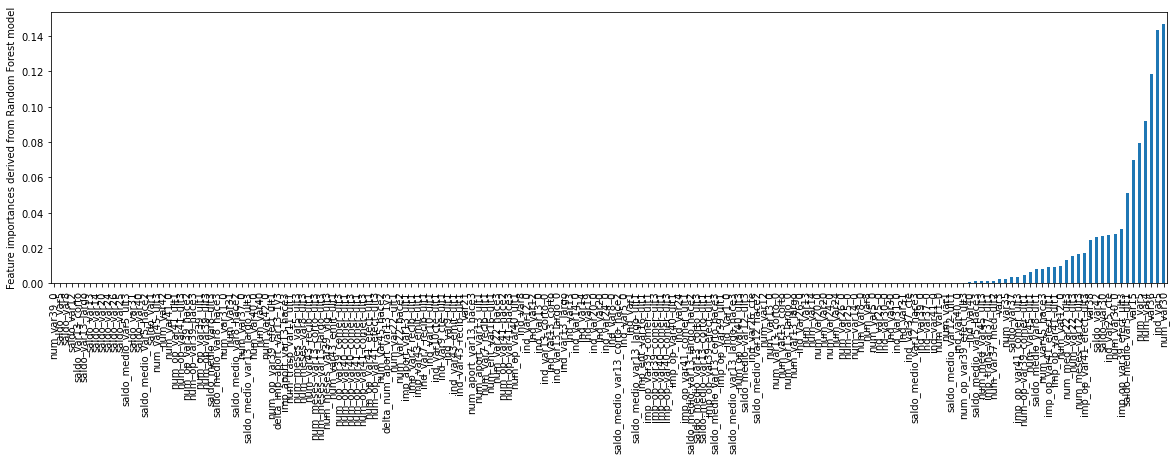

In [60]:
pd.Series(rfe.feature_importances_).plot.bar(figsize=(20,5))
plt.ylabel('Feature importances derived from Random Forest model')
plt.show

The model removes features from left to right, one by one.

In [61]:
# performance of the Random Forest model using all features

rfe.initial_model_performance_

0.7675761929904802

In [62]:
# drop in performance when removing each feature
rfe.performance_drifts_

{'num_var39_0': -0.0022983311361324255,
 'saldo_var5': 0.052403174619189086,
 'saldo_var8': 0.05355174464488299,
 'saldo_var12': 0.05355174464488299,
 'saldo_var13_corto': 0.05355174464488299,
 'saldo_var13_largo': 0.05355174464488299,
 'saldo_var13': 0.0537197156194088,
 'saldo_var14': 0.0537197156194088,
 'saldo_var20': 0.0537197156194088,
 'saldo_var24': 0.03767350601539843,
 'saldo_var26': -0.034401428068570605,
 'saldo_var25': -0.008948661725206475,
 'saldo_medio_var5_ult3': 0.010073648272955094,
 'saldo_var31': 0.03910136439458156,
 'saldo_var40': -0.03324164783351491,
 'saldo_medio_var5_hace2': 0.030502881584316355,
 'saldo_var1': -0.044342641730677035,
 'num_var45_ult3': 0.03302274047020115,
 'num_var42': -0.01746734185757648,
 'num_var41_0': 0.0021444429871171344,
 'num_op_var41_ult1': -0.011778524938231616,
 'num_op_var41_ult3': 0.015511650770589691,
 'num_op_var39_hace2': 0.002816130706557174,
 'num_op_var39_hace3': -0.02225965030872923,
 'num_op_var39_ult1': 0.0591480072731

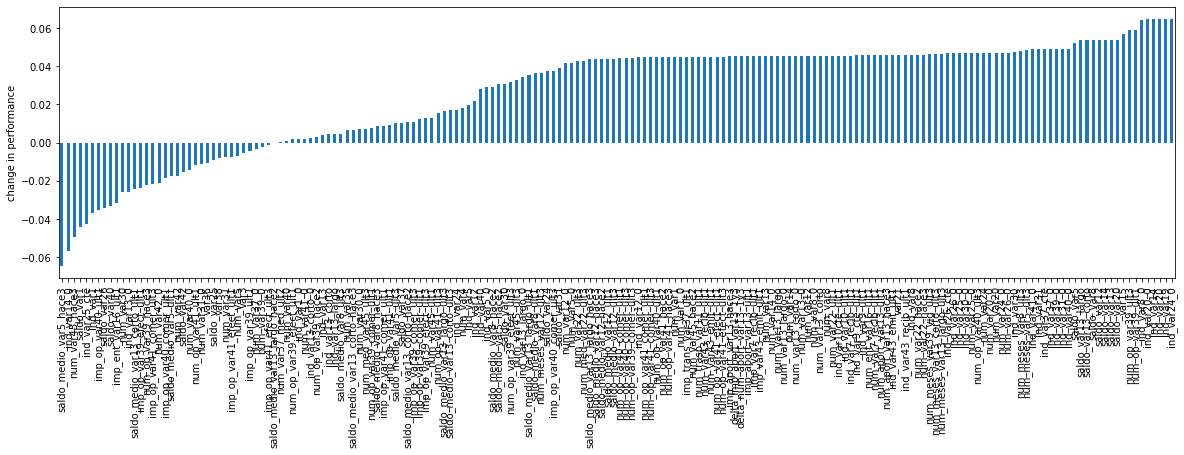

In [63]:
# plot performance drifts
pd.Series(rfe.performance_drifts_).sort_values().plot.bar(figsize=(20,5))
plt.ylabel('change in performance')
plt.show()

In [64]:
len(rfe.features_to_drop_)

83

In [65]:
# remove the variables

print('No. of feats before drop: ', X_train.shape[1])

X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)

print('No. of feasts after drop: ', X_train.shape[1])

No. of feats before drop:  184
No. of feasts after drop:  101


### Select features with Univariate Model Performance

This selection procedure builds 1 model per feature, and selects those features that return models with a performance above a certain threshold.

In [66]:
data = pd.read_csv("..\\train.csv")

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['ID','TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

# Again remove constant, quasi-constant and duplicated features

pipe = Pipeline([('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures())
                ])

# find the features
pipe.fit(X_train, y_train)

# remove the features
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)


In [67]:
sel = SelectBySingleFeaturePerformance(
    estimator = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=1), # the model
    scoring="roc_auc", # the metric to determine model performance
    cv=3, # the cross-validation fold,
    threshold=None, # the performance threshold
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(max_depth=2,
                                                                  n_estimators=10,
                                                                  random_state=1))

In [68]:
# when we leave the threshold to None, the selector selects features which
# performance is bigger than the mean performance of all features

sel.threshold

In [69]:
# the univariate performance of the features

sel.feature_performance_

{'var3': 0.5029632787171933,
 'var15': 0.7046767732309168,
 'imp_ent_var16_ult1': 0.5006955094143339,
 'imp_op_var39_comer_ult1': 0.5075504823753088,
 'imp_op_var39_comer_ult3': 0.5109389082825512,
 'imp_op_var40_comer_ult1': 0.5001164460497465,
 'imp_op_var40_comer_ult3': 0.5000491427552901,
 'imp_op_var40_ult1': 0.5007062151642744,
 'imp_op_var41_comer_ult1': 0.5072222194196698,
 'imp_op_var41_comer_ult3': 0.512288911757716,
 'imp_op_var41_efect_ult1': 0.5179918115025716,
 'imp_op_var41_efect_ult3': 0.5168066681688348,
 'imp_op_var41_ult1': 0.5236644997331971,
 'imp_op_var39_efect_ult1': 0.5179100750635618,
 'imp_op_var39_efect_ult3': 0.5167694782992768,
 'imp_op_var39_ult1': 0.5228100155373502,
 'ind_var1_0': 0.5012573651075508,
 'ind_var1': 0.5020403141549071,
 'ind_var5_0': 0.5179815121227204,
 'ind_var5': 0.6644335369107354,
 'ind_var8_0': 0.522325944684343,
 'ind_var8': 0.5108950623511844,
 'ind_var12_0': 0.5231394976032572,
 'ind_var12': 0.5175438655492329,
 'ind_var13_0': 0.52

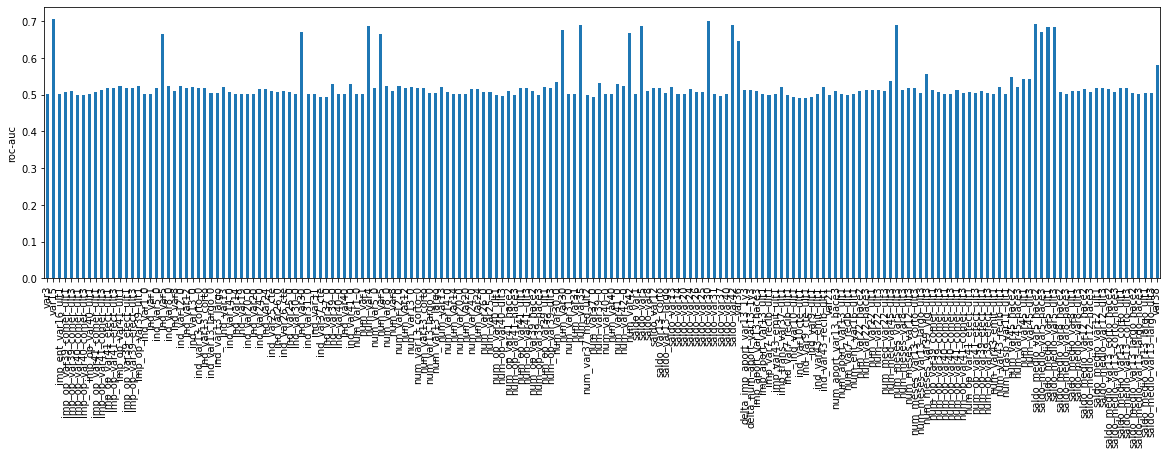

In [70]:
pd.Series(sel.feature_performance_).plot.bar(figsize=(20,5))
plt.ylabel('roc-auc')
plt.show()


In [71]:
# the features that will be dropped

len(sel.features_to_drop_)

156

In [72]:
# remove variables

print('Number of variables before removing non important: ', X_train.shape[1])

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

print('Number of variables after removing non important: ', X_train.shape[1])

Number of variables before removing non important:  184
Number of variables after removing non important:  28


In [73]:
# Compare performance using RF

rf = RandomForestClassifier(n_estimators=10, max_depth=3)

rf.fit(X_train, y_train)

pred = rf.predict_proba(X_train)
print('Train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = rf.predict_proba(X_test)
print('Test roc-auc: {}'.format(roc_auc_score(y_test,pred[:,1])))

Train roc-auc: 0.7868611114847848
Test roc-auc: 0.7752216620601393


### Feature Selection with pipeline


In [74]:
data = pd.read_csv("..\\train.csv")

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['ID','TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)


In [75]:
pipe = Pipeline([('constant', DropConstantFeatures(tol=0.998)),
                 ('duplicated', DropDuplicateFeatures()),
                ('shuffle', SelectByShuffling(estimator=RandomForestClassifier(
                n_estimators=10, max_depth=2, random_state=1),
                                             scoring='roc_auc', cv=3)),
                 ('random_forest', RandomForestClassifier(n_estimators=10,
                                                         max_depth=2, random_state=1)),
                 
                ])

pipe.fit(X_train, y_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('shuffle',
                 SelectByShuffling(estimator=RandomForestClassifier(max_depth=2,
                                                                    n_estimators=10,
                                                                    random_state=1))),
                ('random_forest',
                 RandomForestClassifier(max_depth=2, n_estimators=10,
                                        random_state=1))])

In [76]:
# the pipeline takes in the raw data, removes all unwanted features and then
# makes the prediction with the model trained on the final subset of variables

# obtain predictions and determine model performance


pred = pipe.predict_proba(X_train)
print('Train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = pipe.predict_proba(X_test)
print('Test roc-auc: {}'.format(roc_auc_score(y_test,pred[:,1])))

Train roc-auc: 0.7715536827032449
Test roc-auc: 0.7684207953826243
